# Multiple Linear Regression in StatsModels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Ames Housing dataset!

## Objectives

You will be able to:

* Perform a multiple linear regression using StatsModels
* Visualize individual predictors within a multiple linear regression
* Interpret multiple linear regression coefficients from raw, un-transformed data

## The Ames Housing Dataset

The [Ames Housing dataset](http://jse.amstat.org/v19n3/decock.pdf) is a newer (2011) replacement for the classic Boston Housing dataset. Each record represents a residential property sale in Ames, Iowa. It contains many different potential predictors and the target variable is `SalePrice`.

In [33]:
import pandas as pd
ames = pd.read_csv("ames.csv", index_col = 0)
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [34]:
ames.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We will focus specifically on a subset of the overall dataset. These features are:

```
LotArea: Lot size in square feet

1stFlrSF: First Floor square feet

GrLivArea: Above grade (ground) living area square feet
```

In [35]:
ames_subset = ames[['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']].copy()
ames_subset

,LotArea,1stFlrSF,GrLivArea,SalePrice
Id,,,,
1,8450,856,1710,208500
2,9600,1262,1262,181500
3,11250,920,1786,223500
4,9550,961,1717,140000
5,14260,1145,2198,250000
...,...,...,...,...
1456,7917,953,1647,175000
1457,13175,2073,2073,210000
1458,9042,1188,2340,266500


## Step 1: Visualize Relationships Between Features and Target

For each feature in the subset, create a scatter plot that shows the feature on the x-axis and `SalePrice` on the y-axis.

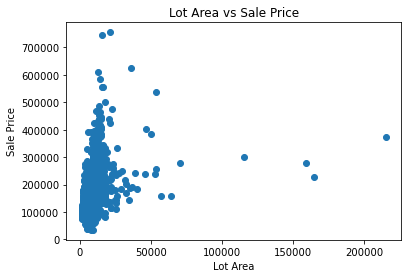

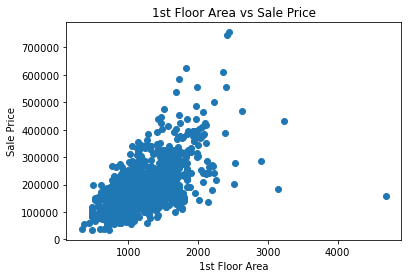

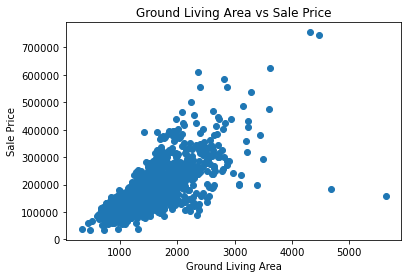

In [36]:
# Your code here - import relevant library, create scatter plots
import matplotlib.pyplot as plt
plt.scatter(ames_subset['LotArea'], ames_subset['SalePrice'])
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.title('Lot Area vs Sale Price')
plt.show()
plt.scatter(ames_subset['1stFlrSF'], ames_subset['SalePrice'])
plt.xlabel('1st Floor Area')
plt.ylabel('Sale Price')
plt.title('1st Floor Area vs Sale Price')
plt.show()
plt.scatter(ames_subset['GrLivArea'], ames_subset['SalePrice'])
plt.xlabel('Ground Living Area')
plt.ylabel('Sale Price')
plt.title('Ground Living Area vs Sale Price')
plt.show()

In [37]:
# Your written answer here - do these seem like good candidates for linear regression?

"""
All three of these features seem to have a linear relationship with SalePrice

1stFlrSF seems to have the most variance vs. SalePrice

All three have a few outliers that could potentially skew the results
"""

'\nAll three of these features seem to have a linear relationship with SalePrice\n\n1stFlrSF seems to have the most variance vs. SalePrice\n\nAll three have a few outliers that could potentially skew the results\n'

## Step 2: Build a Simple Linear Regression Model

Set the dependent variable (`y`) to be the `SalePrice`, then choose one of the features shown in the subset above to be the baseline independent variable (`X`).

Build a linear regression using StatsModels, describe the overall model performance, and interpret its coefficients.

In [38]:
# Your code here - define y and baseline X
ames_subset.corr()['SalePrice']                   # GrLivArea is the most correlated with SalePrice so it will be our baseline X

LotArea      0.263843
1stFlrSF     0.605852
GrLivArea    0.708624
SalePrice    1.000000
Name: SalePrice, dtype: float64

In [39]:
y = ames_subset['SalePrice']
X_baseline = ames_subset[['GrLivArea']]

In [40]:
# Your code here - import StatsModels, fit baseline model, display results
import statsmodels.api as sm

baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = model.fit()
baseline_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     630.3
Date:                Tue, 13 May 2025   Prob (F-statistic):          1.57e-262
Time:                        20:28:31   Log-Likelihood:                -17936.
No. Observations:                1460   AIC:                         3.588e+04
Df Residuals:                    1456   BIC:                         3.590e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.431e+04   4776.331     -2.997      0.003   -2.37e+04   -4944.183
LotArea        0.2841      0.145      1.956      0.051      -0.001       0.569
1stFlrSF      60.2866      4.388     13.739      0.000      51.679      68.894
GrLivArea     80.6061      3.193     25.248      0.000      74.344      86.869
==============================================================================
Omnibus:                      399.604   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13445.161
Skew:                          -0.588   Prob(JB):                         0.00
Kurtosis:                      17.820   Cond. No.                     5.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
# Your written answer here - interpret model results
'''
The model accounts for 50% of the variance in Salesprice
The model is statistically significant overall

Both our intercept and our coefficient for GrLivArea are statistically significant.

Our intercept is about 18,600, meaning that a home with 0 square feet of above-ground
living area would cost about $18.6k.

Our coefficient for GrLivArea is about 107, which means that for each additional square
foot of above ground living area, we expect the price to increase about $107.
'''

'\nThe model accounts for 50% of the variance in Salesprice\nThe model is statistically significant overall\n\nBoth our intercept and our coefficient for GrLivArea are statistically significant.\n\nOur intercept is about 18,600, meaning that a home with 0 square feet of above-ground\nliving area would cost about $18.6k.\n\nOur coefficient for GrLivArea is about 107, which means that for each additional square\nfoot of above ground living area, we expect the price to increase about $107.\n'

## Step 3: Build a Multiple Linear Regression Model

For this model, use **all of** the features in `ames_subset`.

In [42]:
# Your code here - define X
X = ames_subset[['LotArea', '1stFlrSF', 'GrLivArea']]

In [43]:
# Your code here - fit model and display results
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     630.3
Date:                Tue, 13 May 2025   Prob (F-statistic):          1.57e-262
Time:                        20:28:31   Log-Likelihood:                -17936.
No. Observations:                1460   AIC:                         3.588e+04
Df Residuals:                    1456   BIC:                         3.590e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.431e+04   4776.331     -2.997      0.003   -2.37e+04   -4944.183
LotArea        0.2841      0.145      1.956      0.051      -0.001       0.569
1stFlrSF      60.2866      4.388     13.739      0.000      51.679      68.894
GrLivArea     80.6061      3.193     25.248      0.000      74.344      86.869
==============================================================================
Omnibus:                      399.604   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13445.161
Skew:                          -0.588   Prob(JB):                         0.00
Kurtosis:                      17.820   Cond. No.                     5.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
# Your written answer here - interpret model results. Does this model seem better than the previous one?

"""
Our new model is statistically significant overall, and explains about 57% of the
variance in SalePrice. This is about 7% more variance explained than the simple
model.

Using an alpha of 0.05, our intercept and coefficients for 1stFlrSF and GrLivArea
are statistically significant, but not our coefficient for LotArea.

Both our intercept and our coefficient for GrLivArea are statistically significant.

So, we have an improvement in terms of variance explained (R-Squared), but also
some values are not statistically significant. It depends on the use case whether
this model would be considered "better".
"""

'\nOur new model is statistically significant overall, and explains about 57% of the\nvariance in SalePrice. This is about 7% more variance explained than the simple\nmodel.\n\nUsing an alpha of 0.05, our intercept and coefficients for 1stFlrSF and GrLivArea\nare statistically significant, but not our coefficient for LotArea.\n\nBoth our intercept and our coefficient for GrLivArea are statistically significant.\n\nSo, we have an improvement in terms of variance explained (R-Squared), but also\nsome values are not statistically significant. It depends on the use case whether\nthis model would be considered "better".\n'

## Step 4: Create Partial Regression Plots for Features

Using your model from Step 3, visualize each of the features using partial regression plots.

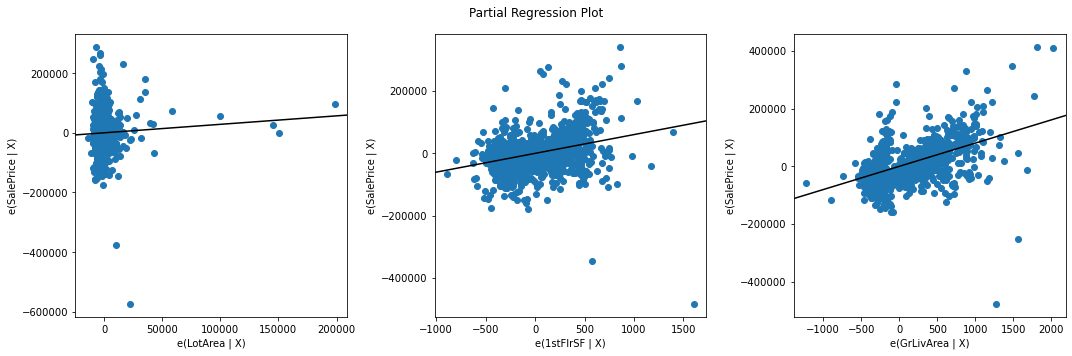

In [45]:
# Your code here - create partial regression plots for each predictor
fig = plt.figure(figsize=(15,5))
sm.graphics.plot_partregress_grid(
    results,
    exog_idx=list(X.columns),
    grid=(1,3),
    fig=fig)
plt.tight_layout()
plt.show()

In [46]:
# Your written answer here - explain what you see, and how this relates
# to what you saw in Step 1. What do you notice?

"""
In the context of a multiple regression model, LotArea seems to be a much weaker
predictor than it initially seemed. The partial regression plot is showing only the
variance in SalePrice that is not already explained by the other variables

1stFlrSF and GrLivArea look roughly the same as they did as standalone scatter
plots, although the slopes are not as steep.

Thinking back to the meaning of these variables, 1stFlrSF and GrLivArea would seem tohave more overlap in the variance they explain, since
they are both related to the square footage of the house. However it seems that
they actually contain different enough information.

The outliers in LotArea might be having more of an impact
than anticipated. That best-fit line is not be where I would have intuitively drawn it
"""

'\nIn the context of a multiple regression model, LotArea seems to be a much weaker\npredictor than it initially seemed. The partial regression plot is showing only the\nvariance in SalePrice that is not already explained by the other variables\n\n1stFlrSF and GrLivArea look roughly the same as they did as standalone scatter\nplots, although the slopes are not as steep.\n\nThinking back to the meaning of these variables, 1stFlrSF and GrLivArea would seem tohave more overlap in the variance they explain, since\nthey are both related to the square footage of the house. However it seems that\nthey actually contain different enough information.\n\nThe outliers in LotArea might be having more of an impact\nthan anticipated. That best-fit line is not be where I would have intuitively drawn it\n'

## Level Up (Optional)

Re-create this model in scikit-learn, and check if you get the same R-Squared and coefficients.

In [47]:
# Your code here - import linear regression from scikit-learn and create and fit model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [48]:
# Your code here - compare R-Squared
results.rsquared


0.5649801771384368

In [49]:
lr.score(X, y)

0.5649801771384368

In [50]:
# Your code here - compare intercept and coefficients

results.params.values

array([-1.43134089e+04,  2.84133589e-01,  6.02866463e+01,  8.06060583e+01])

In [51]:
import numpy as np
np.append(lr.intercept_, lr.coef_)

array([-1.43134089e+04,  2.84133589e-01,  6.02866463e+01,  8.06060583e+01])

## Summary
Congratulations! You fitted your first multiple linear regression model on the Ames Housing data using StatsModels.